# Data Question 1: An Exploration of UN data

##Guided Practice:

1. Download two CSV files and place them in the data folder of your local 
Data Question 1 repository: 
a. Gross Domestic Product (GDP) per capita: 
http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY 
.GDP.PCAP.PP.KD 
• DO NOT APPLY ANY FILTERS 
• rename the file to gdp_per_capita.csv 
• open it with a text editor (not Excel) and take a look 

b. Percentage of Individuals using the Internet: 
http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H 
• DO NOT APPLY ANY FILTERS 
• rename the file to internet_use.csv 
• open it with a text editor (not Excel) and take a look 

2. Create a Jupyter Notebook in the notebooks folder and name it UN_Data_Exploration.

• You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it. 
• Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from ‘Code’ to ‘Markdown’. Here is a link to a cheat sheet showing the basics of styling text using Markdown.

In [1]:
### 3.Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

### 4. plots show in the notebook without having to call plt.show() every time

%matplotlib inline

In [2]:
###5. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [3]:
## Take a look at the first 10 rows.
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN
9,Afghanistan,2009,1502.354073,NaN


In [4]:
## Look at the last 5 rows. Do you see a problem?
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN
6729,footnoteSeqID,Footnote,NaN,NaN
6730,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [5]:
## Redo the read_csv() call to correct this issue - do not modify the original csv file.
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')[:-2]
#gdp_df = gdp_df[:-2]

In [6]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [7]:
### 5. Drop the ‘Value Footnotes’ column (axis=1 for columns and axis=0 for rows)
gdp_df =gdp_df.drop(['Value Footnotes'], axis=1)
gdp_df.head(5)

,Country or Area,Year,Value
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [8]:
## 6. and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.
gdp_df.rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value':'GDP_Per_Capita'}, inplace = True)
gdp_df.head(5)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [9]:
### 7. How many rows and columns does gdp_df have?
gdp_df.shape

(6729, 3)

In [62]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
Country           6729 non-null object
Year              6729 non-null int64
GDP_Per_Capita    6729 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


In [10]:
## What are the data types of its columns?
gdp_df.dtypes

Country            object
Year               object
GDP_Per_Capita    float64
dtype: object

In [11]:
## If any of the columns are not the expected types, figure out why and fix it.
gdp_df['Year'] = pd.to_numeric(gdp_df['Year'])

In [12]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [13]:
### 8. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?
gdp_df['Year'].value_counts().sort_index()

1990    210
1991    211
1992    213
1993    215
1994    218
1995    224
1996    224
1997    226
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    238
2005    238
2006    238
2007    239
2008    240
2009    241
2010    241
2011    243
2012    241
2013    241
2014    240
2015    240
2016    239
2017    239
2018    226
Name: Year, dtype: int64

Years goes from 1990 to 2018 and the number of observations per year are not the same and range from 210 to 243.

In [19]:
### 9. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?
gdp_df['Country'].value_counts()

Eswatini                                             29
Ethiopia                                             29
Venezuela                                            29
IDA blend                                            29
Malawi                                               29
The Bahamas                                          29
Honduras                                             29
Papua New Guinea                                     29
Sierra Leone                                         29
Namibia                                              29
Rwanda                                               29
Uruguay                                              29
Georgia                                              29
Cameroon                                             29
Belgium                                              29
Europe & Central Asia (IDA & IBRD)                   29
Congo                                                29
Angola                                          

There is 243 different countries represented in this dataset and the least represented are Djibouti, South Sudan, Turks and caicos Islands and Sint Maaten. These 4 last are less represented which means several GDP per capita per years are missing from these countries. For example Djibouti gave only one and from question 8. I can say the year given was 2011.


In [26]:
### 10. Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.
gdp_2014 = gdp_df.loc[gdp_df['Year'] == 2014]

In [27]:
gdp_2014.head()

,Country,Year,GDP_Per_Capita
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555


In [28]:
### 11. Use .describe() to find the summary statistics for GDP per capita in 2014.
gdp_2014.describe()

,Year,GDP_Per_Capita
count,240.0,240.000000
mean,2014.0,18034.303556
std,0.0,19320.930599
min,2014.0,672.681648
25%,2014.0,4301.187365
50%,2014.0,11868.067810
75%,2014.0,24388.408410
max,2014.0,130439.106674


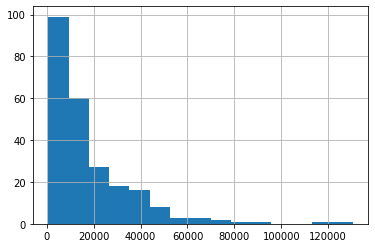

In [63]:
### 12. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?
#gdp_2014.hist(column='GDP_Per_Capita', bins=15)
gdp_2014.GDP_Per_Capita.hist(bins=15)

The distribution is skewed to the right. The majority of the data is found between 0 and 20,000. After 20,000 there is less and less values and there is some ouliers around 120,000.

In [40]:
###13. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.
gdp_2014_up = gdp_2014.sort_values('GDP_Per_Capita', axis=0, ascending = False)
gdp_2014_up.head(5)

,Country,Year,GDP_Per_Capita
3639,"Macao SAR, China",2014,130439.106674
5003,Qatar,2014,116693.507701
3610,Luxembourg,2014,92349.186429
5316,Singapore,2014,81965.361071
707,Brunei,2014,76448.593329


In [42]:
gdp_2014_down = gdp_2014.sort_values('GDP_Per_Capita', axis=0, ascending = True)
gdp_2014_down.head(5)

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804


14. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [70]:
gdp_pivoted = gdp_df[(gdp_df['Year'] == 1990) |
                    (gdp_df['Year'] == 2017)].pivot_table(values = 'GDP_Per_Capita', index = 'Country', columns= 'Year').dropna()

In [71]:
gdp_pivoted.head()

Year,1990,2017
Country,,
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
Arab World,10491.507721,15542.746104


15. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [72]:
gdp_pivoted['Percent_Change'] = 100*(gdp_pivoted[2017] - gdp_pivoted[1990])/gdp_pivoted[1990]

In [73]:
gdp_pivoted.head()

Year,1990,2017,Percent_Change
Country,,,
Albania,4458.247115,11796.719185,164.604426
Algeria,10300.015042,13822.389087,34.197756
Angola,4761.229638,6044.972035,26.962413
Antigua and Barbuda,17454.549799,22400.379562,28.335476
Arab World,10491.507721,15542.746104,48.145972


16. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [89]:
gdp_pivoted.loc[gdp_pivoted.Percent_Change < 0].sort_values('Percent_Change', ascending = False)

Year,1990,2017,Percent_Change
Country,,,
Comoros,2580.500555,2555.966364,-0.950753
Kyrgyz Republic,3474.667969,3393.617990,-2.332596
Aruba,37140.024657,35861.828118,-3.441561
Guinea-Bissau,1633.612989,1576.748994,-3.480873
Congo,5323.022707,5103.142821,-4.130734
The Gambia,2448.493198,2240.327478,-8.501789
The Bahamas,31005.636485,28318.107428,-8.667873
Zimbabwe,2819.549467,2568.410072,-8.907075
Brunei,84693.336970,72523.729446,-14.369026


In [92]:
gdp_pivoted[gdp_pivoted['Percent_Change'] < 0].shape

(20, 3)

There is 20 countries with a negative percentage.

17. Which country had the highest % change in GDP per capita? Create a line plot showing this country’s GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?

In [91]:
gdp_pivoted.nlargest(1, 'Percent_Change')

Year,1990,2017,Percent_Change
Country,,,
Equatorial Guinea,1017.764136,22298.942144,2090.973464


It's equatorial Guinea.

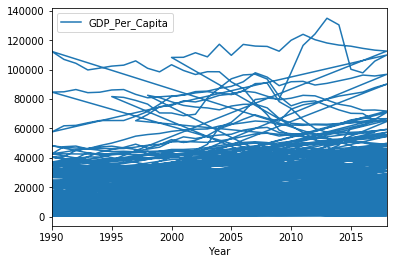

In [97]:
gdp_df.plot(x ='Year', y='GDP_Per_Capita', kind = 'line')

In [99]:
gdp_pivoted.nlargest(2, 'Percent_Change')

Year,1990,2017,Percent_Change
Country,,,
Equatorial Guinea,1017.764136,22298.942144,2090.973464
China,1521.963868,15253.993071,902.257241


In [ ]:
### Bonus: Put both line charts on the same plot.